# Current code

Welcome to my 2x2 factorial anova program.

What would you like to do with your data:
Enter 1 to load in the data file
Enter 2 to view data frame
Enter 3 to tidy data
Enter 4 to generate summary statistics
Enter 5 to visualise the data
Enter 6 to perform and report an ANOVA

2
Displaying Data Frame


,Participant,Prime,Target,Reaction Time
0,1,Positive,Positive,1502
1,2,Positive,Positive,1535
2,3,Positive,Positive,1563
3,4,Positive,Positive,1492
4,5,Positive,Positive,1560
...,...,...,...,...
587,144,Negative,Negative,1474
588,145,Negative,Negative,1535
589,146,Negative,Negative,1575
590,147,Negative,Negative,1505



What would you like to do with your data:
Enter 1 to load in the data file
Enter 2 to view data frame
Enter 3 to tidy data
Enter 4 to generate summary statistics
Enter 5 to visualise the data
Enter 6 to perform and report an ANOVA

5

What visualisation would you like to generate?
Enter 1 for categorical scatterplots 
Enter 2 for categorical distribution plots
Enter 3 for categorical estimate plots
Enter b to go back
            
            3

What categorical estimate plot would you like to generate?
Enter 1 for a point plot
Enter 2 for a bar plot
Enter b to go back

                1


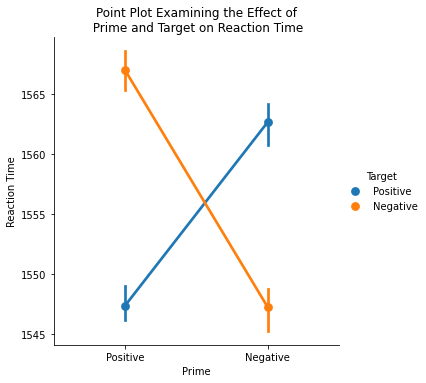


What categorical estimate plot would you like to generate?
Enter 1 for a point plot
Enter 2 for a bar plot
Enter b to go back

                b

What visualisation would you like to generate?
Enter 1 for categorical scatterplots 
Enter 2 for categorical distribution plots
Enter 3 for categorical estimate plots
Enter b to go back
            
            b

What would you like to do with your data:
Enter 1 to load in the data file
Enter 2 to view data frame
Enter 3 to tidy data
Enter 4 to generate summary statistics
Enter 5 to visualise the data
Enter 6 to perform and report an ANOVA

6
Performing ANOVA
                   Anova
             F Value Num DF  Den DF  Pr > F
-------------------------------------------
Prime         0.3132 1.0000 147.0000 0.5766
Target        0.2365 1.0000 147.0000 0.6275
Prime:Target 17.1778 1.0000 147.0000 0.0001



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats
from statsmodels.stats.anova import AnovaRM
print('Welcome to my 2x2 factorial anova program.')
def anova_function():
    options = input('''
What would you like to do with your data:
Enter 1 to load in the data file
Enter 2 to view data frame
Enter 3 to tidy data
Enter 4 to generate summary statistics
Enter 5 to visualise the data
Enter 6 to perform and report an ANOVA

''')
    if options == '1':
        substring = '.csv'
        def load_data_function():
            global participant
            global data
            global IV1
            global IV2
            global DV
            file = input('''
Enter your csv type file name or enter 'b' to go back. 
Please ensure that data is in long format before entering: 

        ''')
            if substring in file:
                print('csv type file loaded in.')
                data = pd.read_csv(file)
                mapping = {data.columns[0]: 'Participant'}
                data = data.rename(columns=mapping)
                participant = data.columns[0]
                IV1 = data.columns[1]
                IV2 = data.columns[2]
                DV = data.columns[3]
            elif file == 'b':
                anova_function()
            else:
                print('Invalid option. Try again.')
                load_data_function_again()
        def load_data_function_again():
            load_data_function()
        load_data_function()        
    elif options == '2':
        print('Displaying Data Frame')
        display(data)
    elif options == '3':
        def tidy_data_function():
            global data
            global participant
            global IV1
            global IV2
            global DV
            global grouped_data
            global grouped_means
            global grouped_errors
            columns_levels = input('''
What would you like to tidy?
Enter 1 to rename the columns
Enter 2 to rename the levels
Enter b to go back

        ''')
            if columns_levels == '1':
                IV1 = input('''
Enter your first independent variable: 

            ''')
                IV2 = input('''
Enter your second independent variable: 

            ''')
                DV = input('''
Enter your dependent variable: 
            
            ''')
                mapping = {data.columns[1]: IV1, data.columns[2]: IV2, data.columns[3]: DV}
                data = data.rename(columns=mapping)
                grouped_data = data.groupby([IV1,IV2])
                grouped_means = grouped_data[DV].mean()
                grouped_errors = grouped_data[DV].std()
            elif columns_levels == '2':
                def levels_rename():
                    global data
                    global grouped_data
                    global grouped_means
                    global grouped_errors
                    level_origin = input('''
What would you like to rename: 

                ''')
                    level_change = input('''
What would you like to rename it to: 

                ''')
                    data = data.replace([level_origin],[level_change])
                    grouped_data = data.groupby([IV1,IV2])
                    grouped_means = grouped_data[DV].mean()
                    grouped_errors = grouped_data[DV].std()

                    levels_rename_again()

                def levels_rename_again():
                    global data
                    change_levels = input('''
Would you like to rename another level? y/n: 

            ''')
                    if change_levels == 'y':
                        levels_rename()
                    elif change_levels == 'n':
                        anova_function()
                    else:
                        levels_rename_again()        
                levels_rename()
            elif columns_levels == 'b':
                anova_function()
            else:
                print('Invalid choice. Try again')
                tidy_data_function_again()
        def tidy_data_function_again():
            tidy_data_function()
        tidy_data_function()
    elif options == '4':
        print ('Displaying summary statistics')
        display(data[[IV1, IV2, DV]].groupby([IV1,IV2]).describe())
    elif options == '5':
        def visualisations_function():
            vis_type = input('''
What visualisation would you like to generate?
Enter 1 for categorical scatterplots 
Enter 2 for categorical distribution plots
Enter 3 for categorical estimate plots
Enter b to go back
            
            ''')
            if vis_type == '1':
                def scat_type_function():
                    scat_type = input('''
What categorical scatterplot would you like to generate?
Enter 1 for a strip plot
Enter 2 for a swarm plot
Enter b to to back

                ''')
                    if scat_type == '1':
                        sns.catplot(x=IV1, y=DV, hue=IV2,
                        data=data, kind='strip')
                        plt.title('Strip Plot Examining the Effect of\n ' + IV1 + ' and ' + IV2 + ' on ' + DV)
                        plt.show()
                    elif scat_type == '2':
                        sns.catplot(x=IV1, y=DV, hue=IV2,
                        data=data, kind='swarm')
                        plt.title('Swarm Plot Examining the Effect of\n ' + IV1 + ' and ' + IV2 + ' on ' + DV)
                        plt.show()
                    elif scat_type == 'b':
                        visualisations_function_again()
                    else:
                        print('Invalid choice. Please try again.')
                        scat_type_function_again()
                    scat_type_function_again()
                def scat_type_function_again():
                    scat_type_function()
                scat_type_function()
            elif vis_type == '2':
                def dist_type_function():
                    dist_type = input('''
What categorical distribution plot would you like to generate?
Enter 1 for a box plot
Enter 2 for a violin plot
Enter 3 for a boxen plot
Enter b to go back

                ''')
                    if dist_type == '1':
                        sns.catplot(x=IV1, y=DV, hue=IV2,
                        data=data, kind='box')
                        plt.title('Box Plot Examining the Effect of\n ' + IV1 + ' and ' + IV2 + ' on ' + DV)
                        plt.show()
                    elif dist_type == '2':
                        sns.catplot(x=IV1, y=DV, hue=IV2,
                        data=data, kind='violin')
                        plt.title('Violin Plot Examining the Effect of\n ' + IV1 + ' and ' + IV2 + ' on ' + DV)
                        plt.show()
                    elif dist_type == '3':
                        sns.catplot(x=IV1, y=DV, hue=IV2,
                        data=data, kind='boxen')
                        plt.title('Boxen Plot Examining the Effect of\n ' + IV1 + ' and ' + IV2 + ' on ' + DV)
                        plt.show()
                    elif dist_type == 'b':
                        visualisations_function_again()
                    else:
                        print('Invalid choice. Please try again.')
                        dist_type_function_again()
                    dist_type_function_again()
                def dist_type_function_again():
                    dist_type_function()
                dist_type_function()
            elif vis_type == '3':
                def est_type_function():
                    est_type = input('''
What categorical estimate plot would you like to generate?
Enter 1 for a point plot
Enter 2 for a bar plot
Enter b to go back

                ''')
                    if est_type == '1':
                        sns.catplot(x=IV1, y=DV, hue=IV2,
                        data=data, kind='point', ci=30)
                        plt.title('Point Plot Examining the Effect of\n ' + IV1 + ' and ' + IV2 + ' on ' + DV)
                        plt.show()
                    elif est_type == '2':
                        sns.catplot(x=IV1, y=DV, hue=IV2,
                        data=data, kind='bar', ci=100)
                        plt.title('Bar Plot Examining the Effect of\n ' + IV1 + ' and ' + IV2 + ' on ' + DV)
                        plt.show()
                    elif est_type == 'b':
                        visualisations_function_again()
                    else:
                        print('Invalid choice. Please try again.')
                        est_type_function_again()
                    est_type_function_again()
                def est_type_function_again():
                    est_type_function()
                est_type_function()
            elif vis_type == 'b':
                anova_function()
            else:
                print('Invalid choice. Please try again.')
                visualisations_function_again()
        def visualisations_function_again():
            visualisations_function()   
        visualisations_function()  
    elif options == '6':
        print('Performing ANOVA')
        print(AnovaRM(data=data, depvar=DV, within=[IV1,IV2], subject=participant).fit())
        pairwise_comp = input(
'Would you like to carry out pairwise comparisons? y/n\n(Note these are only recommended when there is a significant interaction between ' + IV1 + ' and ' + IV2 + ')')
        if pairwise_comp == 'y':
            print('''
Performing pairwise comparisons:       
            ''')
            print('t-test result for Positive ' + IV2 + 's in Positive and Negative ' + IV1 + 's:')
            index = (data[IV1]=='Positive') & (data[IV2]=='Positive')
            PP = data[index][DV]
            index = (data[IV1]=='Negative') & (data[IV2]=='Positive')
            NP = data[index][DV]
            print(stats.ttest_rel(PP, NP))
            print('''
''')
            print('t-test result for Negative ' + IV2 + 's in Positive and Negative ' + IV1 + 's:')
            index = (data[IV1]=='Positive') & (data[IV2]=='Negative')
            PN = data[index][DV] 
            index = (data[IV1]=='Negative') & (data[IV2]=='Negative')
            NN = data[index][DV]
            print(stats.ttest_rel(PN, NN))
        elif pairwise_comp == 'n':
            anova_function()
    else:
        print('Invalid choice. Please try again.')
    anova_function_again()

def anova_function_again():
    anova_function()
    
anova_function()